In [159]:
import pandas as pd
Data = pd.read_csv('Data\match\match_data.csv',index_col=0)

In [160]:
Data['opponent_speed'] = Data['opponent_attack_rho'] / Data['frame_dif'] *30
Data['player_speed'] = Data['player_defend_rho'] / Data['frame_dif'] *30
intercepts = []
factor1 = []
factor2 = []

In [161]:
from sklearn.neighbors import LocalOutlierFactor
X_train = Data[['opponent_attack_rho', 'opponent_speed']]
lof = LocalOutlierFactor(n_neighbors=350)
yhat = lof.fit_predict(X_train)
mask = yhat != -1
X_train = X_train.loc[mask,:]

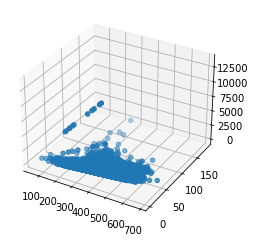

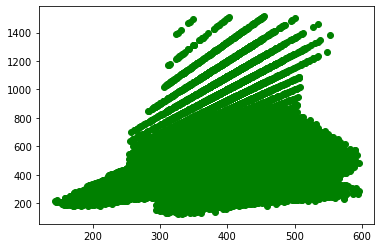

In [162]:
import matplotlib.pyplot as plt
ax = plt.subplot(111,projection='3d')
ax.scatter(Data['opponent_attack_rho'], Data['frame_dif'], Data['opponent_speed'])
plt.show()
plt.close()
plt.plot(X_train['opponent_attack_rho'], X_train['opponent_speed'], 'go')
plt.show()
plt.close()

In [163]:
from sklearn.linear_model import LinearRegression
import numpy as np
LR = LinearRegression(fit_intercept=True)
LR.fit(X_train['opponent_attack_rho'].to_numpy().reshape(-1,1), X_train['opponent_speed'])
intercept = LR.intercept_
intercepts.append(intercept)
slope = LR.coef_[0]
factor1.append(slope)
factor2.append(np.nan)

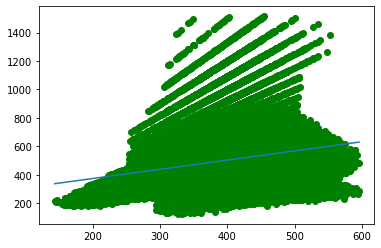

In [164]:
plt.plot(X_train['opponent_attack_rho'], X_train['opponent_speed'], 'go')
min_x = min(X_train['opponent_attack_rho'])
max_x = max(X_train['opponent_attack_rho'])
plt.plot([min_x,max_x],[min_x*slope+intercept,max_x*slope+intercept])

In [165]:
from sklearn.neighbors import LocalOutlierFactor
X_train = Data[['player_defend_rho', 'player_speed']]
lof = LocalOutlierFactor(n_neighbors=100)
yhat = lof.fit_predict(X_train)
mask = yhat != -1
X_train = X_train.loc[mask,:]

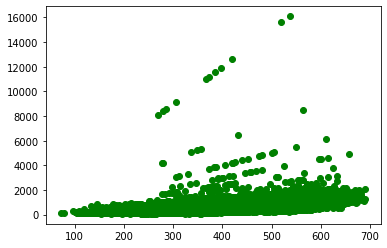

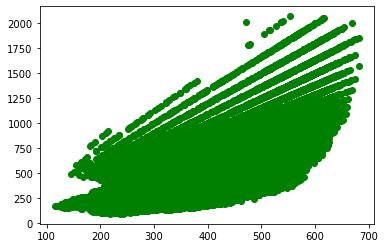

In [166]:
import matplotlib.pyplot as plt
plt.plot(Data['player_defend_rho'], Data['player_speed'], 'go')
plt.show()
plt.close()
plt.plot(X_train['player_defend_rho'], X_train['player_speed'], 'go')
plt.show()
plt.close()

In [167]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(X_train['player_defend_rho'].to_numpy().reshape(-1,1))

In [168]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
LR = LinearRegression(fit_intercept=True,)
LR.fit(poly_features, X_train['player_speed'])
intercept = LR.intercept_
intercepts.append(intercept)
slope = LR.coef_[0]
factor1.append(slope)
factor2.append(LR.coef_[1])

In [169]:
LR.coef_

array([-2.2157169 ,  0.00534067])

In [170]:
y_predict = LR.predict(poly_features)

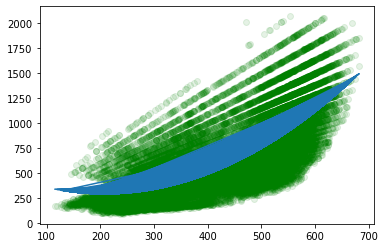

In [171]:
plt.plot(X_train['player_defend_rho'], X_train['player_speed'], 'go', alpha=0.1)
min_x = min(X_train['player_defend_rho'])
max_x = max(X_train['player_defend_rho'])
plt.plot(X_train['player_defend_rho'], y_predict)

In [172]:
player_speed = pd.DataFrame({
    'intercepts':intercepts,
    'fac1':factor1,
    'fac2':factor2,
    'degree':[1,2]
},index=['opponent','player'])

In [173]:
player_speed

,intercepts,fac1,fac2,degree
opponent,243.736632,0.647863,NaN,1
player,522.315049,-2.215717,0.005341,2


In [174]:
player_speed.to_csv('Data/player_speed_model.csv')